# Curso IBM Badge - Machine Learning Using Python

## Victor Hugo Negrisoli - Desenvolvedor Full-Stack Pleno & Analista de Dados

## Aprendizado Supervisionado - Regressão Linear Simples e Múltipla e Regressão Não Linear

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
%matplotlib inline

### Lendo e descrevendo o conjunto de dados

In [2]:
dados = pd.read_csv('dados/FuelConsumptionCo2.csv')
dados.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
dados.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Reduzindo o modelo de dados apenas para os dados que queremos utilizar

In [4]:
dados_previsao = dados[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
dados_previsao.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


### Plotando visualizações para explorar os dados

In [5]:
# Essa função irá configurar a matplotlib para sempre plotar com o show(), removendo as mensagens de back-end do Pandas
# e irá sempre definir o tamanho da imagem

def configurar_plot(titulo, x, y, altura, largura):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(altura, largura)
    plt.show()

#### Iremos plotar um histograma com todas as colunas disponíveis

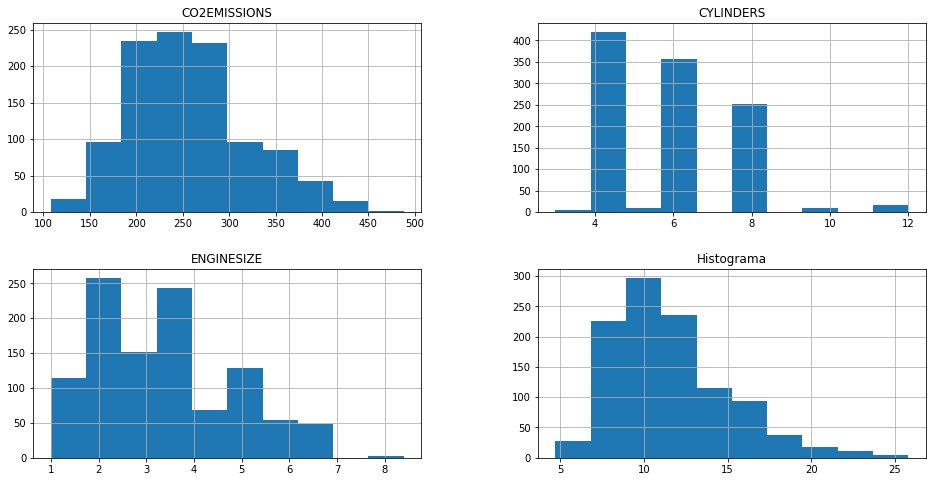

In [6]:
dados_previsao[['CYLINDERS',
                'ENGINESIZE',
                'CO2EMISSIONS',
                'FUELCONSUMPTION_COMB']
              ].hist()

configurar_plot(
    'Histograma',
    '',
    '',
    16,
    8
)

#### Iremos plotar um scatter (dispersão) com as colunas de consumo de combustível , tamanho do motor e cilindro por emissão de CO2

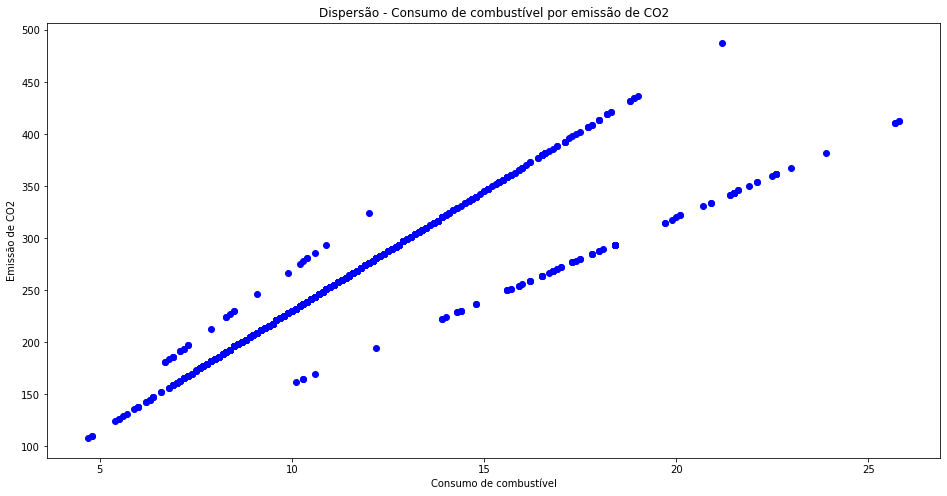

In [7]:
plt.scatter(
    dados_previsao['FUELCONSUMPTION_COMB'], 
    dados_previsao['CO2EMISSIONS'], 
    color = 'b'
)

configurar_plot(
    'Dispersão - Consumo de combustível por emissão de CO2',
    'Consumo de combustível',
    'Emissão de CO2',
    16,
    8
)

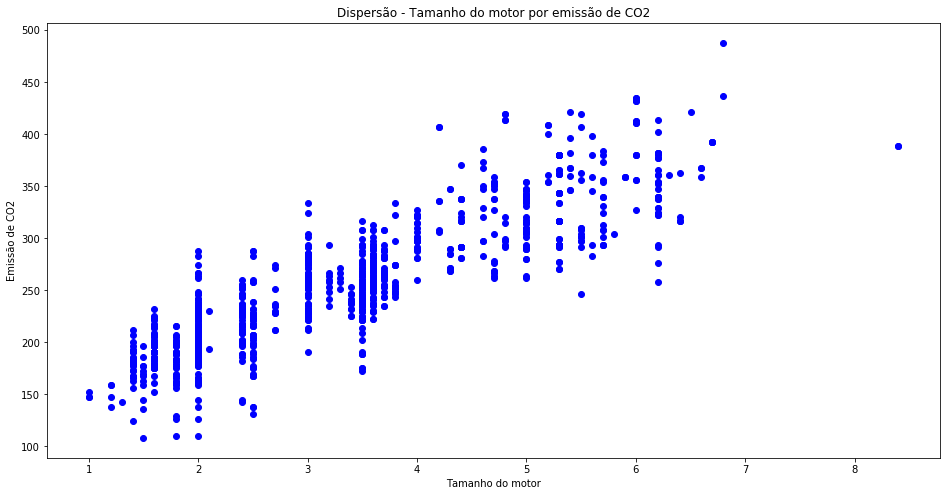

In [8]:
plt.scatter(
    dados_previsao['ENGINESIZE'], 
    dados_previsao['CO2EMISSIONS'],
    color = 'b'
)

configurar_plot(
    'Dispersão - Tamanho do motor por emissão de CO2',
    'Tamanho do motor', 'Emissão de CO2',
    16, 
    8
)

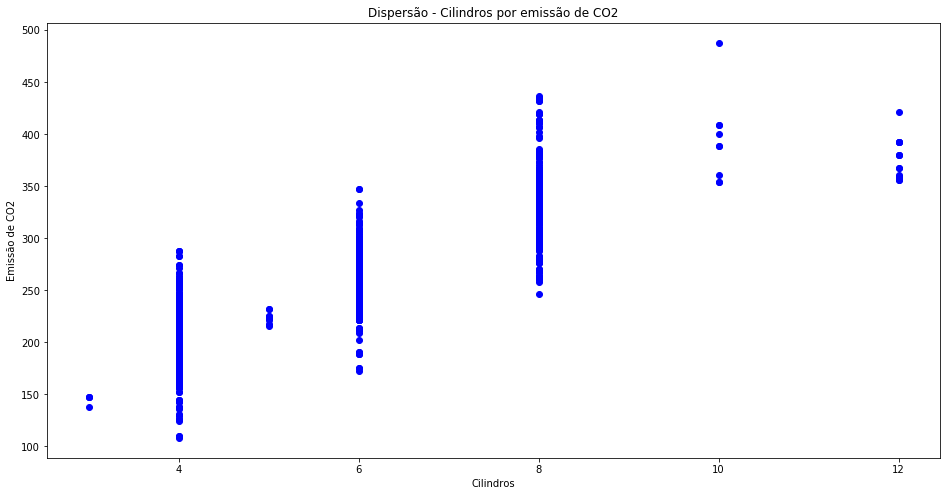

In [9]:
plt.scatter(dados_previsao['CYLINDERS'], dados_previsao['CO2EMISSIONS'], color = 'b')
configurar_plot(
    'Dispersão - Cilindros por emissão de CO2', 
    'Cilindros', 
    'Emissão de CO2',
    16, 
    8
)

### Criando um dataset de treino e de teste básico

In [10]:
array = np.random.rand(len(dados)) < 0.8
treino = dados_previsao[array]
teste = dados_previsao[~array]

In [11]:
treino.size

3352

In [12]:
teste.size

916

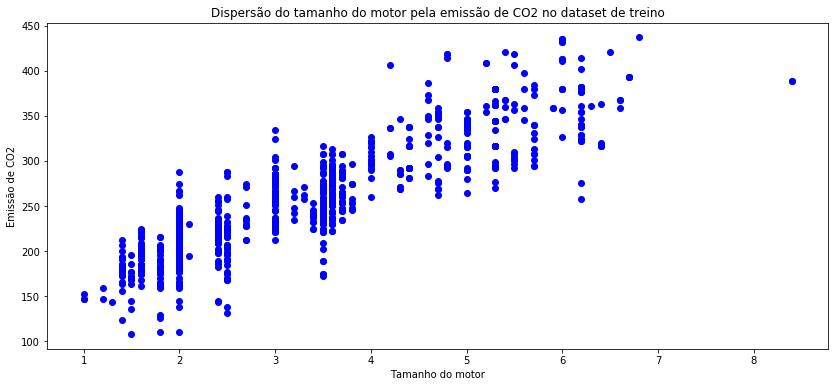

In [13]:
plt.scatter(
    treino['ENGINESIZE'], 
    treino['CO2EMISSIONS'],
    color='b'
)

configurar_plot(
    'Dispersão do tamanho do motor pela emissão de CO2 no dataset de treino', 
    'Tamanho do motor',
    'Emissão de CO2',
    14,
    6
)

### Criando o modelo utilizando a Scikit-Learn

In [14]:
regressao_linear = linear_model.LinearRegression()

treino_x = np.asanyarray(treino[['ENGINESIZE']])
treino_y = np.asanyarray(treino[['CO2EMISSIONS']])

regressao_linear.fit(treino_x, treino_y)

coeficiente = regressao_linear.coef_[0][0]
interceptor = regressao_linear.intercept_[0]

print('Coeficiente: {}'.format(coeficiente))
print('Interceptor: {}'.format(interceptor))

Coeficiente: 39.492696511240176
Interceptor: 124.70093795643302


#### Plotando a regressão linear simples: y = interceptor + coeficiente * x1

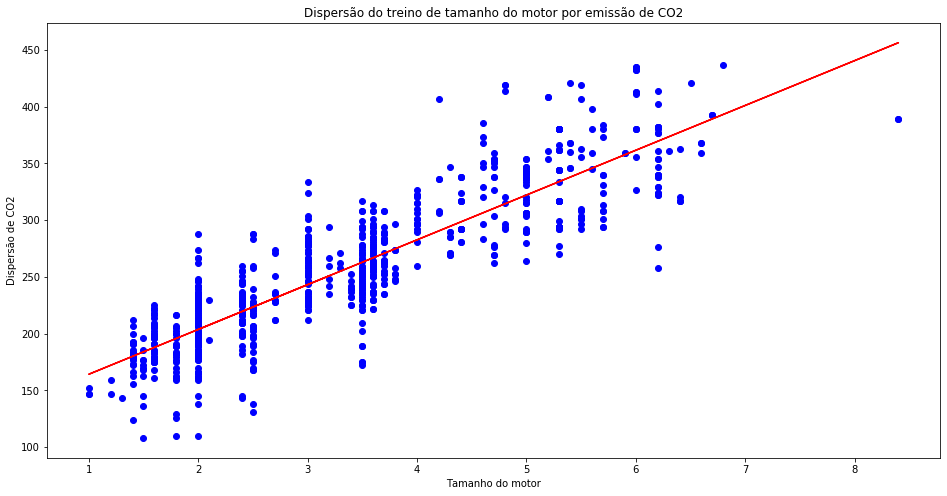

In [15]:
regressao_linear_calculo = interceptor + coeficiente * treino_x 

plt.scatter(treino['ENGINESIZE'], treino['CO2EMISSIONS'],  color='blue')
plt.plot(treino_x, regressao_linear_calculo, '-r')
configurar_plot(
    'Dispersão do treino de tamanho do motor por emissão de CO2',
    'Tamanho do motor',
    'Dispersão de CO2',
    16,
    8
)

### Avaliando o modelo criado e prevendo valores

In [16]:
# Agora, iremos pegar os datasets de teste.
# O teste de x será utilizado como previsão para o teste de y 
# Iremos comparar o teste y com o teste y de predições

teste_x = np.asanyarray(teste[['ENGINESIZE']])
teste_y = np.asanyarray(teste[['CO2EMISSIONS']])

teste_y_previsao = regressao_linear.predict(teste_x)

#### Comparando os resultados

In [17]:
# Iremos verificar o Erro Percentual Absoluto Médio, Erro Médio Quadrático e o teste R2-Score

print('Erro Percentual Absoluto Médio: {}'.format(str(np.mean(np.absolute(teste_y_previsao - teste_y)))))
print('Erro Médio Quadrático: {}'.format(str(np.mean((teste_y_previsao - teste_y) ** 2))))
print('Teste R2-Score: {}'.format(str(r2_score(teste_y_previsao, teste_y))))

Erro Percentual Absoluto Médio: 23.273014508668112
Erro Médio Quadrático: 1024.7058767222773
Teste R2-Score: 0.6493016892986917


#### Regressão Linear Múltipla - Prevendo a emissão de CO2 com base no tamanho do motor e nos cilindros

In [18]:
regressao_linear_multipla = linear_model.LinearRegression()

treino_x = np.asanyarray(treino[['ENGINESIZE', 'CYLINDERS']])
treino_y = np.asanyarray(treino[['CO2EMISSIONS']])

regressao_linear.fit(treino_x, treino_y)

coeficiente = regressao_linear.coef_[0][0]
interceptor = regressao_linear.intercept_[0]

print('Coeficiente: {}'.format(coeficiente))
print('Interceptor: {}'.format(interceptor))

Coeficiente: 29.440190170021896
Interceptor: 108.90407918773494


#### Plotando a regressão linear múltipla: y = interceptor + coeficiente_1 * x1 + coeficiente_2 * x2 + ... coeficiente_n + xn 

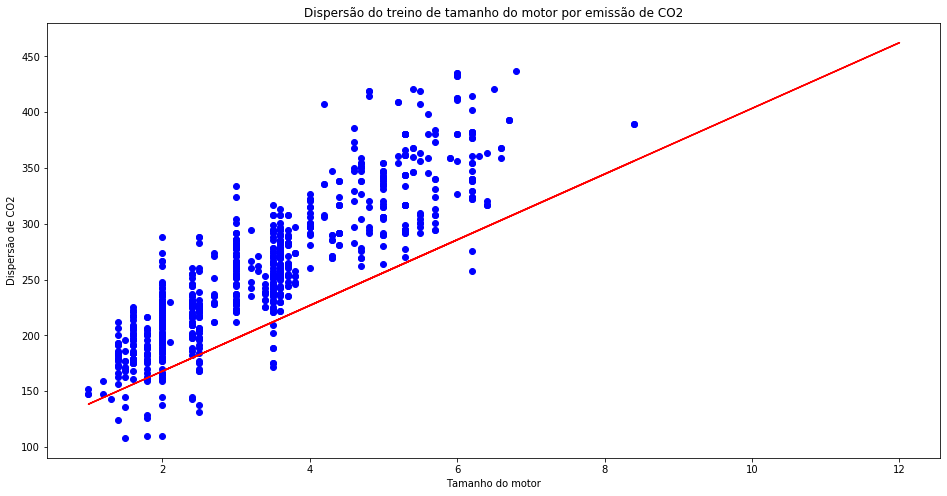

In [19]:
regressao_linear_calculo = interceptor + coeficiente * treino_x 

plt.scatter(treino['ENGINESIZE'], treino['CO2EMISSIONS'],  color='blue')
plt.plot(treino_x, regressao_linear_calculo, '-r')
configurar_plot(
    'Dispersão do treino de tamanho do motor por emissão de CO2',
    'Tamanho do motor',
    'Dispersão de CO2',
    16,
    8
)

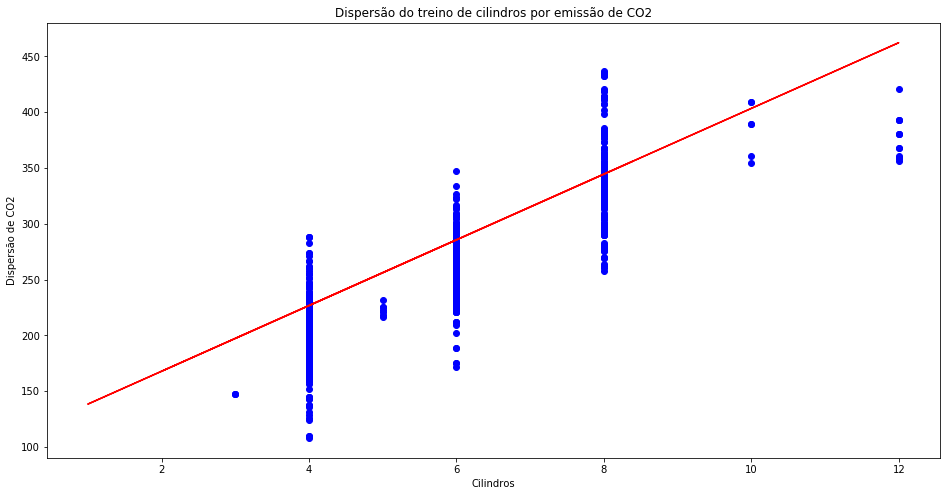

In [20]:
regressao_linear_calculo = interceptor + coeficiente * treino_x 

plt.scatter(treino['CYLINDERS'], treino['CO2EMISSIONS'],  color='blue')
plt.plot(treino_x, regressao_linear_calculo, '-r')
configurar_plot(
    'Dispersão do treino de cilindros por emissão de CO2',
    'Cilindros',
    'Dispersão de CO2',
    16,
    8
)

In [21]:
# Agora, iremos pegar os datasets de teste.
# O teste de x será utilizado como previsão para o teste de y 
# Iremos comparar o teste y com o teste y de predições

teste_x = np.asanyarray(teste[['ENGINESIZE', 'CYLINDERS']])
teste_y = np.asanyarray(teste[['CO2EMISSIONS']])

teste_y_previsao = regressao_linear.predict(teste_x)

# Iremos verificar o Erro Percentual Absoluto Médio, Erro Médio Quadrático e o teste R2-Score

print('Erro Percentual Absoluto Médio: {}'.format(str(np.mean(np.absolute(teste_y_previsao - teste_y)))))
print('Erro Médio Quadrático: {}'.format(str(np.mean((teste_y_previsao - teste_y) ** 2))))
print('Teste R2-Score: {}'.format(str(r2_score(teste_y_previsao, teste_y))))

Erro Percentual Absoluto Médio: 23.100371365443177
Erro Médio Quadrático: 977.8895191566232
Teste R2-Score: 0.6745413091424182


## Regressão Não Linear - Utilizando a Regressão Logística

In [22]:
dados = pd.read_csv('dados/china_gdp.csv')
dados.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


#### Separando os dados dos eixos x e y

In [40]:
dados_x, dados_y = (dados['Year'].values, dados['Value'].values)

In [41]:
dados_x

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

In [42]:
dados_y

array([5.91841165e+10, 4.95570502e+10, 4.66851785e+10, 5.00973033e+10,
       5.90622549e+10, 6.97091531e+10, 7.58794348e+10, 7.20570286e+10,
       6.99934979e+10, 7.87188205e+10, 9.15062113e+10, 9.85620238e+10,
       1.12159814e+11, 1.36769878e+11, 1.42254742e+11, 1.61162492e+11,
       1.51627687e+11, 1.72349014e+11, 1.48382112e+11, 1.76856525e+11,
       1.89649992e+11, 1.94369049e+11, 2.03549627e+11, 2.28950201e+11,
       2.58082147e+11, 3.07479586e+11, 2.98805793e+11, 2.71349773e+11,
       3.10722214e+11, 3.45957486e+11, 3.58973230e+11, 3.81454704e+11,
       4.24934066e+11, 4.42874596e+11, 5.62261130e+11, 7.32032045e+11,
       8.60844098e+11, 9.58159425e+11, 1.02527690e+12, 1.08944711e+12,
       1.20526068e+12, 1.33223472e+12, 1.46190649e+12, 1.64992872e+12,
       1.94174560e+12, 2.26859890e+12, 2.72978403e+12, 3.52309431e+12,
       4.55843107e+12, 5.05941974e+12, 6.03965851e+12, 7.49243210e+12,
       8.46162316e+12, 9.49060260e+12, 1.03548317e+13])

#### Plotando os dados para verificar como é a curva do gráfico

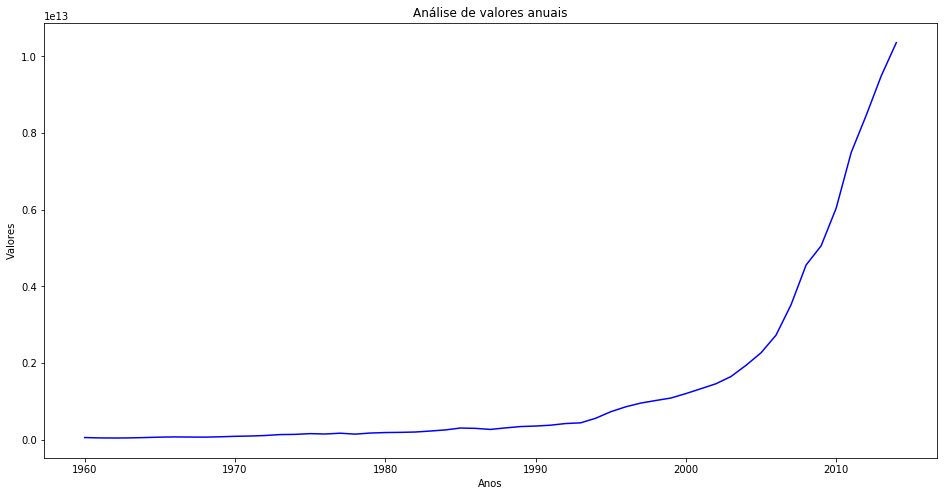

In [44]:
plt.plot(
    dados_x,
    dados_y,
    'b'
)
configurar_plot('Análise de valores anuais', 'Anos', 'Valores', 16, 8)

### Iniciando um modelo - Regressão Logística:  Y_ = 1 / (1 + e ^ b1 (X - b2))

In [47]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

In [48]:
X

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [49]:
Y

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

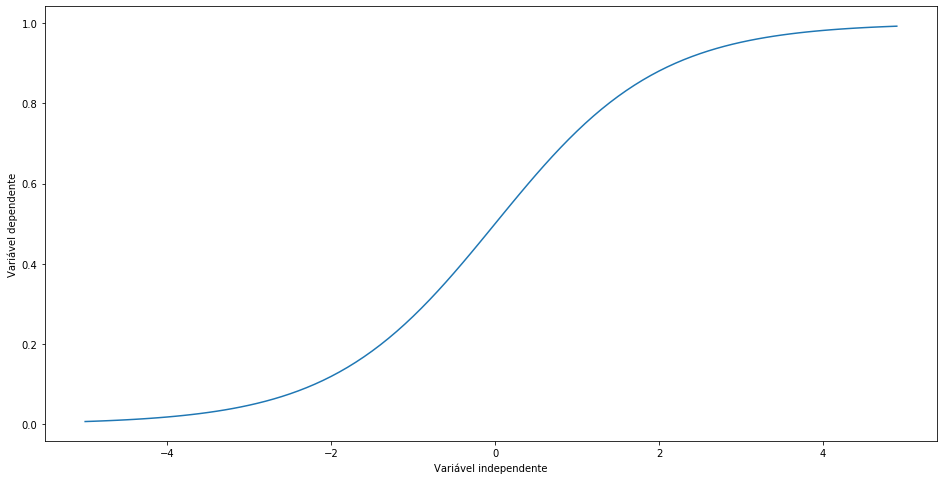

In [50]:
plt.plot(X, Y) 
configurar_plot('', 'Variável independente', 'Variável dependente', 16, 8)
plt.show()

### Criando a função para o nosso modelo de regressão logística

In [52]:
def calcular_reg_logistica(x, b1, b2):
    y = 1 / (1 + np.exp(-b1 * (x - b2)))
    return y

#### Definindo os valores de beta 1 e beta 2 e calculando as predições 

In [54]:
b1 = 0.10
b2 = 1990.0

predicao_y = calcular_reg_logistica(dados_x, b1, b2)
predicao_y

array([0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.9168273 ])

#### Plotando os resultados comparando os datasets

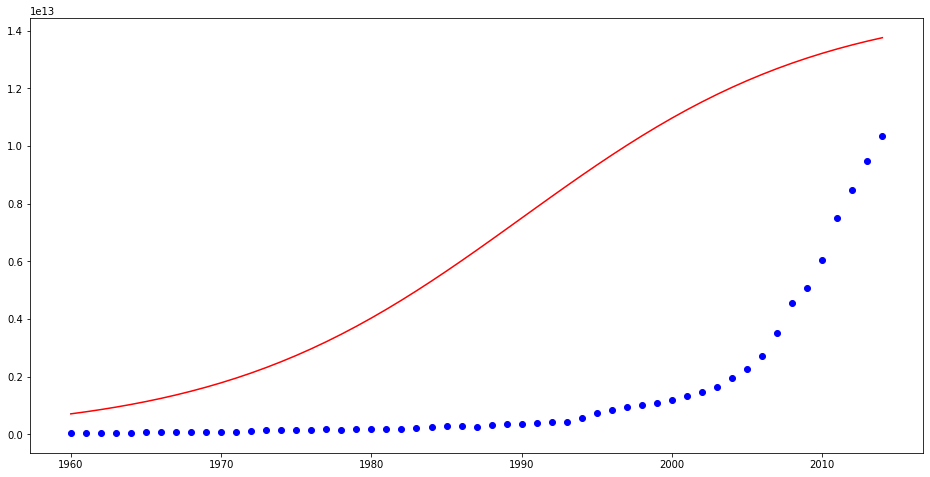

In [58]:
plt.plot(dados_x, predicao_y * 15000000000000., 'r')
plt.plot(dados_x, dados_y, 'bo')
configurar_plot('', '', '', 16, 8)

#### Normalizando os datasets x e y

In [60]:
dados_x_normalizado = dados_x / max(dados_x)
dados_y_normalizado = dados_y / max(dados_y)

In [61]:
dados_x_normalizado

array([0.97318769, 0.97368421, 0.97418073, 0.97467726, 0.97517378,
       0.97567031, 0.97616683, 0.97666336, 0.97715988, 0.97765641,
       0.97815293, 0.97864945, 0.97914598, 0.9796425 , 0.98013903,
       0.98063555, 0.98113208, 0.9816286 , 0.98212512, 0.98262165,
       0.98311817, 0.9836147 , 0.98411122, 0.98460775, 0.98510427,
       0.98560079, 0.98609732, 0.98659384, 0.98709037, 0.98758689,
       0.98808342, 0.98857994, 0.98907646, 0.98957299, 0.99006951,
       0.99056604, 0.99106256, 0.99155909, 0.99205561, 0.99255214,
       0.99304866, 0.99354518, 0.99404171, 0.99453823, 0.99503476,
       0.99553128, 0.99602781, 0.99652433, 0.99702085, 0.99751738,
       0.9980139 , 0.99851043, 0.99900695, 0.99950348, 1.        ])

In [62]:
dados_y_normalizado

array([0.0057156 , 0.00478589, 0.00450854, 0.00483806, 0.00570384,
       0.00673204, 0.00732793, 0.00695878, 0.0067595 , 0.00760213,
       0.00883705, 0.00951846, 0.01083164, 0.01320831, 0.01373801,
       0.01556399, 0.01464318, 0.01664431, 0.01432975, 0.01707961,
       0.01831512, 0.01877086, 0.01965745, 0.02211047, 0.02492384,
       0.02969431, 0.02885665, 0.02620514, 0.03000746, 0.03341025,
       0.03466722, 0.03683833, 0.04103727, 0.04276985, 0.0542994 ,
       0.07069473, 0.08313453, 0.09253259, 0.09901435, 0.10521147,
       0.11639597, 0.12865827, 0.1411811 , 0.15933902, 0.18752073,
       0.21908602, 0.26362418, 0.34023675, 0.44022261, 0.48860473,
       0.58326959, 0.7235687 , 0.81716665, 0.91653856, 1.        ])

#### Utilizando a função curve_fit da Scikit-Learn para encontrar os melhores parâmetros

In [69]:
b1, b2 = curve_fit(calcular_reg_logistica, dados_x_normalizado, dados_y_normalizado)

In [71]:
print(b1[0])
print(b2[1])

690.4517109968472
[-2.88118984e-04  7.25961449e-09]


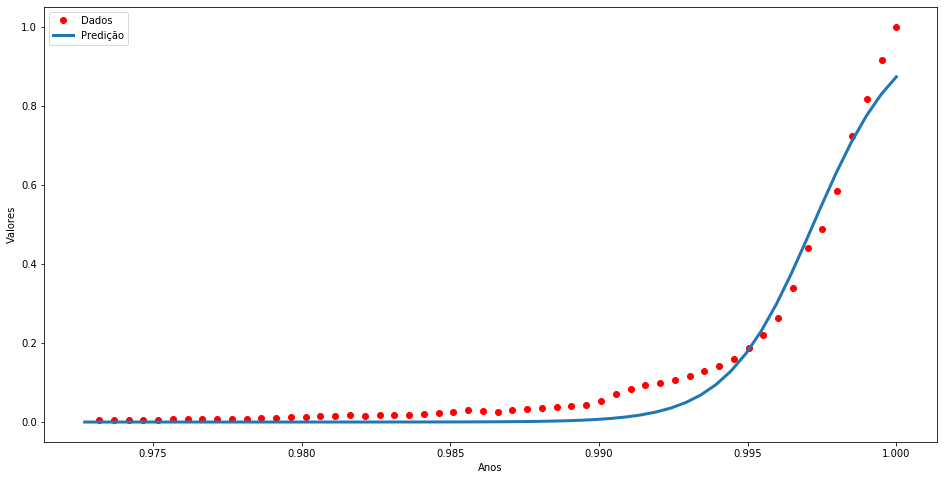

In [80]:
x = np.linspace(1960, 2015, 55)

x = x / max(x)

y = calcular_reg_logistica(x, *b1)

plt.plot(dados_x_normalizado, dados_y_normalizado, 'ro', label='Dados')
plt.plot(x,y, linewidth=3.0, label='Predição')
plt.legend(loc='best')

configurar_plot('', 'Anos', 'Valores', 16, 8)